<div style="background:red;color:white;border:2px solid black;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Standard usage:</font></i></b>
<ul>
    <li>Requires Jupyter 3.0 and ipywidgets (type "pip install ipywidgets" in windows command line.)</li>
    <li>Copy this notebook to your desired location.</li>
    <li>Do not modify the first 4 cells in this notebook.</li>
    <li>Run the raw code toggle cell (code cell #1)</li>
    <li>Select a pkl with the "Get File Path" button. <b>It is recommended to have only one pkl file in a given folder!</b></li>
    <li>Once the pkl file has been chosen, the notebook will run all the cells automatically.</li>
    <li>Adjust the parameters with the sliding bar to get desired results. <b>Make sure to hit the "submit changes and rerun below cells" button after each change.</b></li>
    <li>Make sure to hit "save all" button when you are done. Standardized the results will be saved into the same folder containing the pkl file.</li>
</ul>
<br>
</div>

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Raw code toggle</font></i></b>
<hr>
<ul>
    <li>If code is hidden and you don't see a button, click the hidden cell right below this cell and run it</li>
    <ul>
        <li>It's very thin and between this cell and the "Get File Path" cell, sorry for the inconvenience</li>
    </ul>
</ul>
<br>
</div>

In [1]:
from IPython.display import Javascript,display
from corticalmapping.ipython_lizard.html_widgets import raw_code_toggle
raw_code_toggle()
display(Javascript("""var nb = IPython.notebook;
                      //var is_code_cell = (nb.get_selected_cell().cell_type == 'code')
                      //var curr_idx = (nb.get_selected_index() == 3);
                      nb.select(3);
                      nb.execute_cell();
                      """))

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Javascript
from corticalmapping.ipython_lizard.ipython_filedialog import IPythonTkinterFileDialog
initial_dir = r"C:"

tkinter_file_dialog = IPythonTkinterFileDialog(initial_dir)
tkinter_file_dialog.execute_below = True
tkinter_file_dialog.show()

<IPython.core.display.Javascript object>

In [3]:
import os
from PyQt4 import QtGui,QtCore
import matplotlib.pyplot as plt
import matplotlib as mpl
from warnings import warn
#mpl.rcParams['figure.figsize'] = 10, 10
from corticalmapping import ipython_lizard
from corticalmapping.ipython_lizard.wrapped_retinotopic_mapping import WrappedRetinotopicMapping
from corticalmapping.ipython_lizard.patchplot_ipywidgets import PatchPlotWidgets
from corticalmapping.ipython_lizard.html_widgets import getSignMapWidget,getRawPatchMapWidget,getRawPatchesWidget, \
                                                        splitPatchesWidget,mergePatchesWidget,getEccentricityMapWidget, \
                                                        saveFinalResultWidget,submitAndRunBelowButton

%matplotlib inline
#%load_ext autoreload
#%autoreload 2

E:\data\python_packages\corticalmapping\corticalmapping\core\tifffile.py:2170: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
E:\data\python_packages\corticalmapping\corticalmapping\core\tifffile.py:2170: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
E:\data\python_packages\corticalmapping\corticalmapping\core\tifffile.py:2170: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [4]:
pkl_path = tkinter_file_dialog.file_path

TEST_PKL_IDX = 0
TEST_PATH = ipython_lizard.TEST_PKLS[TEST_PKL_IDX] #there are like 6  different test pkls in this iterable
current_dir = os.getcwd()
adj_pkl_paths = [os.path.join(current_dir,f) for f in os.listdir(current_dir) if f.endswith("pkl")]
if adj_pkl_paths:
    adj_pkl_path = adj_pkl_paths[0]
else:
    adj_pkl_path = None
pkls = zip(["MANUAL","ADJACENT","TEST"],[pkl_path,adj_pkl_path,TEST_PATH])
for p_type,pkl in pkls:
    try:
        trial = WrappedRetinotopicMapping.load_from_pkl(pkl)
        print "Successfully loaded from: {0}, {1}".format(p_type,pkl)
        __pkl_path = pkl
        break
    except Exception as e:
        #warn(str(e))
        warn("Failed to load from: {0}, {1}".format(p_type,pkl))

_TEST_PKL_USED = (p_type == "TEST")

error importing TextureAtlas: No module named textureatlas
FreeType import Failed: Freetype library not found
Successfully loaded from: MANUAL, E:/data/2015-08-18-M173310-DetectionForaging/20150508_M173310_Trial1_2_3_4.pkl


E:\data\python_packages\aibs\aibs\CorticalMapping\CorticalMappingDev\tifffile.py:2170: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
E:\data\python_packages\aibs\aibs\CorticalMapping\CorticalMappingDev\tifffile.py:2170: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
E:\data\python_packages\aibs\aibs\CorticalMapping\CorticalMappingDev\tifffile.py:2170: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Calculate sign map</font></i></b>
<hr>
<b><i><font size=3>&nbsp;&nbsp;phaseMapFilterSigma:</font></i></b>
<ul>
    <li>The sigma value of Gaussian filter for altitude and azimuth maps</li>
    <li>FLOAT, default = 1.0, recommended range: [0.0, 2.0]</li>
    <li>Large "phaseMapFilterSigma" gives you more patches</li>
    <li>Small "phaseMapFilterSigma" gives you less patches</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;signMapFilterSigma:</font></i></b>
<ul>
    <li>The sigma value of Gaussian filter for visual sign maps</li>
    <li>FLOAT, default = 9.0, recommended range: [0.6, 10.0]</li>
    <li>Large "signMapFilterSigma" gives you less patches</li>
    <li>Small "signMapFilterSigma" gives you more patches</li>
</ul>
<br>
</div>

phaseMapFilterSigma: 1.0
signMapFilterSigma: 9.0
isReverse: False
isFixedRange: True


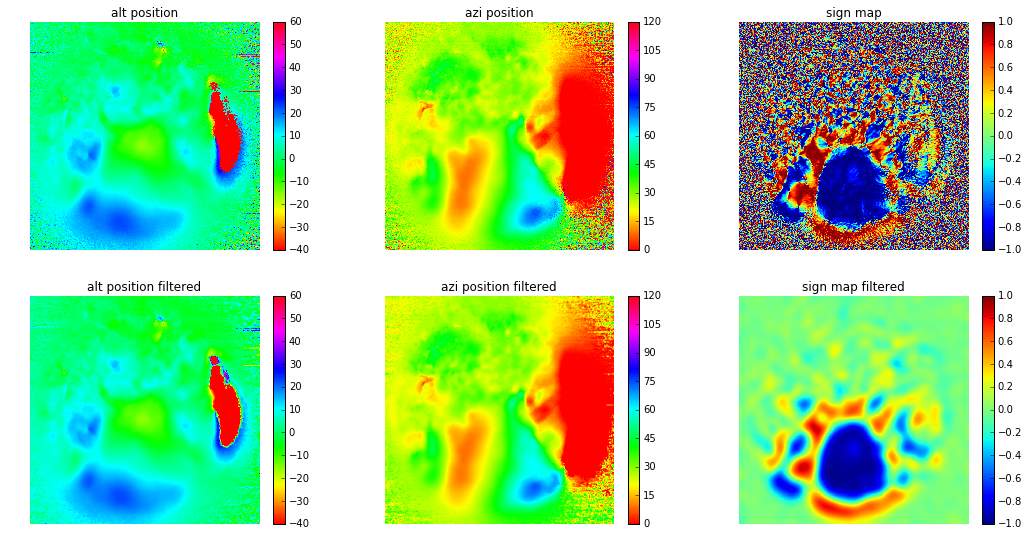

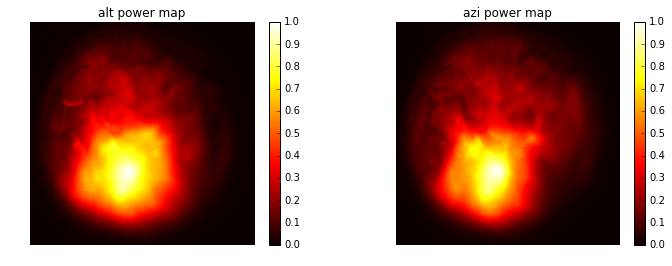

In [5]:
phaseMapFilterSigma = 1.0
signMapFilterSigma = 9.0

getSignMapWidget(trial,
                 phaseMapFilterSigmaDefault=phaseMapFilterSigma,
                 signMapFilterSigmaDefault=signMapFilterSigma,
)
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Get raw patch map</font></i></b>
<hr>
<b><i><font size=3>&nbsp;&nbsp;signMapThr:</font></i></b>
<ul>
    <li>Threshold to binarize visual signmap</li>
    <li>FLOAT, default = 0.35, recommended range: [0.2, 0.5]</li>
    <li>Large signMapThr gives you fewer patches</li>
    <li>Smaller signMapThr gives you more patches</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;closeIter:</font></i></b>
<ul>
    <li>Binary close iteration for each raw patches</li>
    <li>INT, default = 3</li>
    <li>You do not want to change this parameter very often</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;openIter:</font></i></b>
<ul>
    <li>Binary open iteration for each raw patches</li>
    <li>INT, default = 3</li>
    <li>You do not want to change this parameter very often</li>
</ul>
<br>
</div>

signMapThr: 0.35
operIter: 3
closeIter: 3


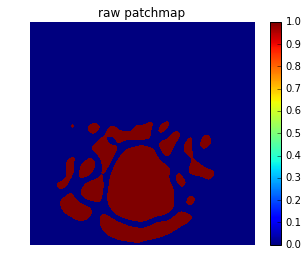

In [6]:
signMapThr = 0.35
openIter = 3
closeIter = 3


getRawPatchMapWidget(trial,
                     signMapThrDefault=signMapThr,
                     openIterDefault=openIter,
                     closeIterDefault=closeIter,
)
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Get dictionary for raw patches</font></i></b>
<hr>
<b><i><font size=3>&nbsp;&nbsp;dilationIter:</font></i></b>
<ul>
    <li>Binary dilation iteration for each raw patches</li>
    <li>INT, default = 15</li>
    <li>You do not want to change this parameter very often</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;borderWidth:</font></i></b>
<ul>
    <li>Pixel number between adjcent patches</li> 
    <li>INT, default = 1</li>
    <li>You do not want to change this parameter very often</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;smallPatchThr:</font></i></b>
<ul>
    <li>The patches with pixel number below this number will be discarded</li> 
    <li>INT, default = 100</li>
    <li>You do not want to change this parameter very often</li>
</ul>
<br>
</div>

dilationIter: 15
borderWidth: 1
smallPatchThr: 100


C:\Anaconda\Lib\site-packages\skimage\measure\_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  connectivity=None):


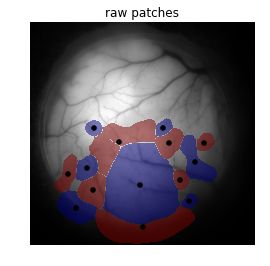

In [7]:
dilationIter = 15
borderWidth = 1
smallPatchThr = 100

getRawPatchesWidget(trial,
                   dilationIterDefault=dilationIter,
                   borderWidthDefault=borderWidth,
                   smallPatchThrDefault=smallPatchThr,
)
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Calculate determinant map</font></i></b>
<hr>
<br>
</div>

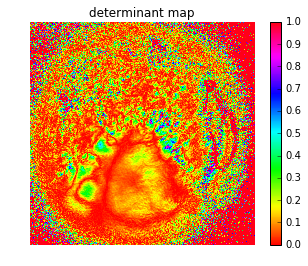

In [8]:
trial.getDeterminantMap()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Calculate eccentricity map</font></i></b>  
<hr>
<b><i><font size=3>&nbsp;&nbsp;eccMapFilterSigma:</font></i></b>
<ul>
    <li>The sigma value of Gaussian filter for eccentricity maps</li> 
    <li>FLOAT, default = 10.0</li>
    <li>You do not want to change this parameter very often, and it may take some time to run</li>
</ul>
<br>
</div>

eccMapFilterSigma: 10.0


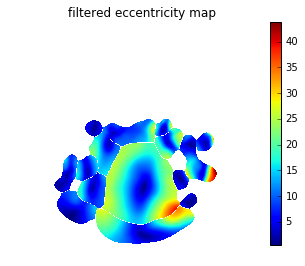

In [9]:
eccMapFilterSigma = 10.0

getEccentricityMapWidget(trial,eccMapFilterSigmaDefault=eccMapFilterSigma)
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Split overlapping patches</font></i></b>
<hr>
<b><i><font size=3>&nbsp;&nbsp;visualSpacePixelSize:</font></i></b>
<ul>
    <li>The pixel size for patch to visual space mapping</li>
    <li>FLOAT, default = 0.5</li>
    <li>You do not want to change this parameter very often</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;visualSpaceCloseIter:</font></i></b>
<ul>
    <li>The binary iteration for visual space coverage for each patch</li> 
    <li>INT, default = 15</li>
    <li>You do not want to change this parameter very often</li> 
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;splitLocalMinCutStep:</font></i></b> 
<ul>
    <li>The step width for detecting number of local minimums during spliting</li>
    <li>FLOAT, default = 5.0, recommend range: [0.5, 15.0]</li>
    <li>Small "splitLocalMinCutStep" will make it more likely to split but into less sub patches</li>
    <li>Large "splitLocalMinCutStep" will make it less likely to split but into more sub patches</li>
</ul>
<br>
<b><i><font size=3>&nbsp;&nbsp;splitOverlapThr:</font></i></b>  
<ul>
    <li>Patches with overlap ration larger than this value will go through the split procedure</li>
    <li>FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0</li>
    <li>Small "splitOverlapThr" will split more patches</li>
    <li>Large "splitOverlapThr" will split less patches</li>
</ul>
<br>
</div>

visualSpacePixelSize: 0.5
visualSpaceCloseIter: 15
splitLocalMinCutStep: 5.0
splitOverlapThr: 1.2
patch06 AU=341.5  AS=323.343870016  ratio=0.946834172814
patch02 AU=539.25  AS=567.305854389  ratio=1.05202754639
patch05 AU=426.5  AS=753.544649055  ratio=1.76681043155
2 local minuma were found!!!
patch09 AU=291.25  AS=283.737404358  ratio=0.974205680198
patch08 AU=257.75  AS=285.895086335  ratio=1.10919529131
patch04 AU=240.0  AS=217.201627174  ratio=0.90500677989
patch12 AU=343.5  AS=354.118287077  ratio=1.03091204389
patch13 AU=69.75  AS=70.4139692538  ratio=1.00951927246
patch07 AU=607.5  AS=602.975226153  ratio=0.992551812598
patch11 AU=68.5  AS=65.8968805516  ratio=0.961998256228
patch01 AU=1667.25  AS=1621.03780676  ratio=0.972282385221
patch10 AU=249.0  AS=441.143999918  ratio=1.77166265027
Only one local minumum was found!!!
patch14 AU=46.25  AS=37.2399086633  ratio=0.805187214342
patch03 AU=792.75  AS=847.947282918  ratio=1.06962760381


E:\data\python_packages\corticalmapping\corticalmapping\RetinotopicMapping.py:684: RuntimeWarning: invalid value encountered in less_equal
  marker[eccMap2 <= (currThr)] = 1


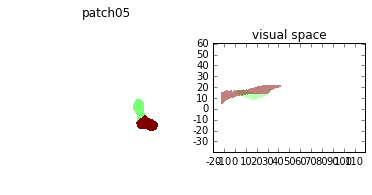

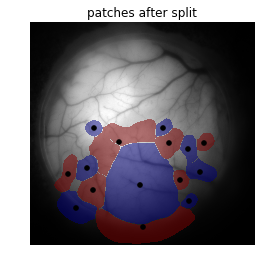

In [10]:
visualSpacePixelSize = 0.5
visualSpaceCloseIter = 15
splitLocalMinCutStep = 5.0
splitOverlapThr = 1.2

splitPatchesWidget(trial,
                   visualSpacePixelSizeDefault=visualSpacePixelSize,
                   visualSpaceCloseIterDefault=visualSpaceCloseIter,
                   splitLocalMinCutStepDefault=splitLocalMinCutStep,
                   splitOverlapThrDefault=splitOverlapThr
)
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Merge non-overlapping patches</font></i></b>
<hr>
<b><i><font size=3>&nbsp;&nbsp;mergeOverlapThr:</font></i></b>
<ul>
    <li>Considering a patch pair (A and B) with same sign, A has visual coverage a deg<sup>2</sup> and B has visual coverage b deg<sup>2</sup></li>
    <li>The overlaping visual coverage between this pair is c deg<sup>2</sup></li> 
    <li>Then if (c/a < "mergeOverlapThr") and (c/b < "mergeOverlapThr"), these two patches will be merged</li> 
    <li>FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0</li> 
    <li>Small "mergeOverlapThr" will merge less patches</li>
    <li>Large "mergeOverlapThr" will merge more patches</li>
</ul>
<br>
</div>

mergeOverlapThr: 0.1
merge iteration: 1


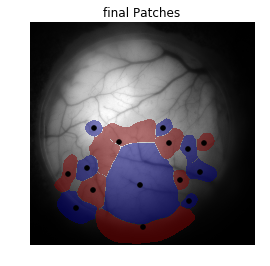

In [11]:
mergeOverlapThr = 0.1

mergePatchesWidget(trial,mergeOverlapThrDefault=mergeOverlapThr)
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Rename patches</font></i></b>
<hr>
<ul>
    <li>Click the patches and type their desired names according to the reference map below</li>
    <li>Established visual area names:</li>
    <ul>
        <li>A, AL, AM, LI, LLA, LM, M, MMA, MMP, P, PM, POR, RL, RLL, RS, S1, V1</li>
    </ul>
    <li>The name you typed within this list will show in green, others will show in orange</li>
</ul>
<br>
</div>

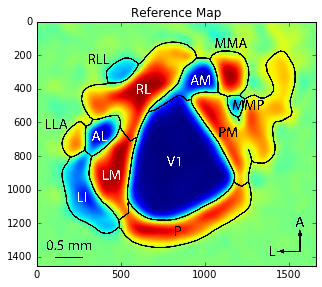

In [12]:
patchplot_widgets = PatchPlotWidgets(trial,{},[],figsize=(5,5))
patchplot_widgets.plot_reference_img()

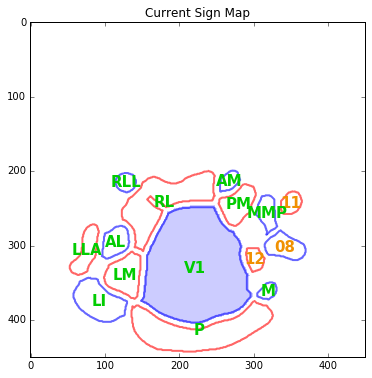

In [13]:
rename_patches_dict = dict(trial.finalPatches)

DESIRED_PATCH_NAMES = ['A','AL','AM','LI','LLA','LM','M','MMA','MMP','P','PM','POR','RL','RLL','RS','S1','V1']

for patch in rename_patches_dict.keys(): #replace 'patch01' with 01, etc
    rename_patches_dict[patch.replace("patch","")] = rename_patches_dict.pop(patch)
patchplot_widgets = PatchPlotWidgets(trial,rename_patches_dict,DESIRED_PATCH_NAMES,figsize=(12,6))

patchplot_widgets.show()
submitAndRunBelowButton()

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Plot final borders</font></i></b>
<hr>
<br>
</div>

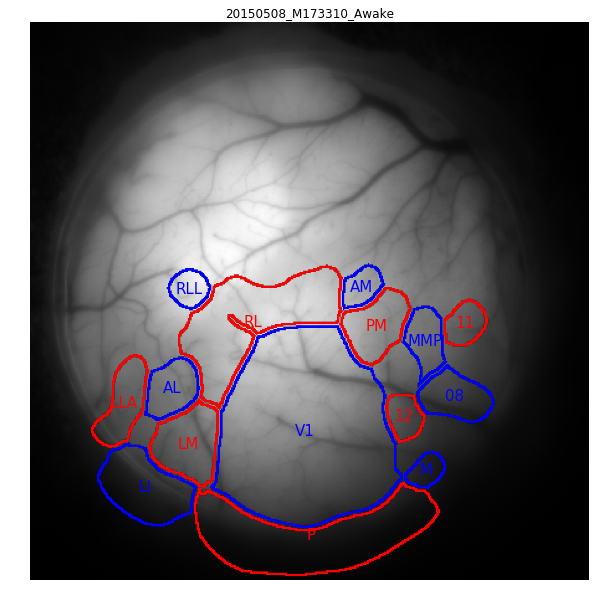

In [16]:
rename_patches_dict = patchplot_widgets.patches_dict
finalPatchBorder_figure = trial.plotFinalPatchBorders(rename_patches_dict,borderWidth=4)
#trial.params["finalPatchesMarked"] = rename_patches_dict
#trial.finalPatchesMarked = rename_patches_dict

<div style="background:#6699FF;color:#FFDDBB;border:1px solid #87868A;border-radius:5px;">
<br>
<b><i><font size=3>&nbsp;Save</font></i></b>
<hr>
<ul>
    <li>Saves the following to the directory containing the original pkl file:</li>
    <ul>
        <li>final borders plot (.png & .pdf)</li>
        <li>updated pkl file</li>
        <li>the current notebook (.ipynb & .html)</li>
    </ul>
</ul>
<br>
</div>

In [17]:
pkl_save_path = None
#saveTrialDictPkl(trial,pkl_save_path)
saveFinalResultWidget(trial,finalPatchBorder_figure,__pkl_path,pkl_save_path,avoid_overwrite=(not _TEST_PKL_USED))